# Making Maps from Spatial Data using RSGISLib

During analysis either to display results, understand the imagery and/or GIS layers we are using or to make a figure for a report or paper it is common that we want to create a map. This would commonly be done within QGIS or ArcGIS but that an be time consuming and be difficult when there are lots of maps to produce or many images to display within a single figure. 

Scripting the generation of those maps can therefore be advantagous, in that they can be easily reproduced or minor changes (e.g., colours or band combinations) which can be difficult in a GUI based package. 

RSGISLib has a module (`rsgislib.tools.mapping`) for doing this analysis based on the `matplotlib` module for generating the plots. Therefore, in using the `rsgislib.tools.mapping` module good knowledge of `matplotlib` (https://matplotlib.org) is helpful and/or is likely to be gained while using this functionality. 

It should be noted that while these functions can replicate many of the common maps types which can be produced in QGIS and/or ArcGIS they are not intended to replace all the things you might ever want to do. 


## `matplotlib` - Overview of how things work

This is all build on the `matplotlib` data model and therefore some understand of how `matplotlib` works is a good place to start. `matplotlib` provides many tutorials (https://matplotlib.org/stable/tutorials/index) and examples (https://matplotlib.org/stable/gallery/index.html) which are a very useful reference.

However, the following notebook will go through some of the basics which you will have useful for using the `rsgislib.tools.mapping` module.

In [1]:
# When using matplotlib within a notebook we
# usually want the output figures to be shown
# within the notebook and by calling this
# option that will happen.
%matplotlib inline

# If you are using a python script (*.py) to
# generate your maps then you do not need to
# use this line.

In [2]:
# Import the matplotlib plotting module
# this is commonly imported as the shorthand
# plt for 'plot':
import matplotlib.pyplot as plt

# It is common that you might want to import other
# parts of the matplotlib module but for now we
# just need this import.

### Create a basic plot

The following example shows how to create a simple scatter plot:

Text(0.5, 1.0, 'A Title')

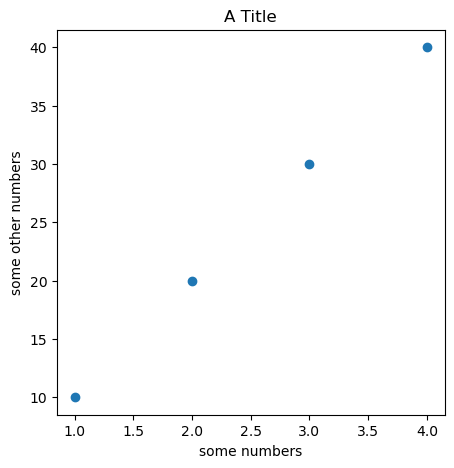

In [3]:
# Create a plot figure and axis using the matplotlib
# module - the plot will 5 x 5 inches and therefore
# be sqaure.
# Two objects are returned:
# fig - The top level container for all the plot elements.
# ax - a single axis object or could be a list of a number
#      of axis objects is multiple axis' are requested.
fig, ax = plt.subplots(figsize=(5, 5))
# Add a scatter plot to the axis
ax.scatter(x=[1, 2, 3, 4], y=[10, 20, 30, 40])
# Add a x axis label to the axis.
ax.set_xlabel("some numbers")
# Add a y axis label to the axis.
ax.set_ylabel("some other numbers")
# Add a title to the plot
ax.set_title("A Title")

### Saving a Plot as an Image File

It is nice to show a plot within a notebook but to use a plot within a report or paper you need to save it as an image file.

It is often attractive to save a figure as a vector file but be careful when the plot has a large number of elements as this can result in very large file sizes and PDF files which are slow to open etc. 

When outputting as a raster layer then you are selecting a resolution (dots per inch; dpi) for the image. Make sure you choose an appropriate resolution for what you want to use the image for. High resolutions will produce larger file sizes but too small and the figure might be pixelated and low in quality. 

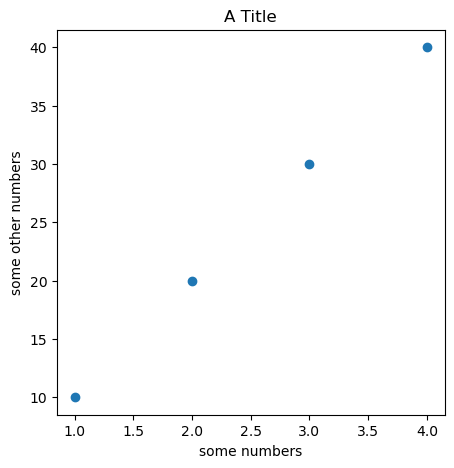

In [4]:
# Create a plot figure and axis using the matplotlib
# module - the plot will 5 x 5 inches and therefore
# be sqaure.
# Two objects are returned:
# fig - The top level container for all the plot elements.
# ax - a single axis object or could be a list of a number
#      of axis objects is multiple axis' are requested.
fig, ax = plt.subplots(figsize=(5, 5))
# Add a scatter plot to the axis
ax.scatter(x=[1, 2, 3, 4], y=[10, 20, 30, 40])
# Add a x axis label to the axis.
ax.set_xlabel("some numbers")
# Add a y axis label to the axis.
ax.set_ylabel("some other numbers")
# Add a title to the plot
ax.set_title("A Title")
# Use the savefig function to save the figure as an image
# file:
plt.savefig("plot_image.png")
# Use the savefig function and specify the
# resolution of the output image file
plt.savefig("plot_image_dpi500.png", dpi=500)
# Save the figure as a vector PDF file:
plt.savefig("plot_vector.pdf")

### Adding Multiple Datasets to an Axis

An axis can have more than one datasets added to it, similar to adding layers within a GIS. 

Note, this is how we can add different mapping elements using the `rsgislib.tools.mapping` functions to replicate the type of functionality provided by a desktop GIS. 

Text(0.5, 1.0, 'A Title')

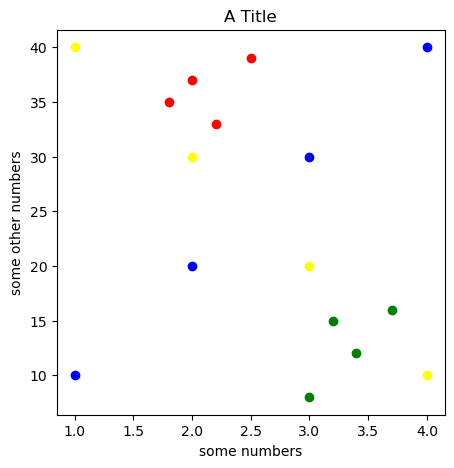

In [5]:
# Create the figure and axis
fig, ax = plt.subplots(figsize=(5, 5))
# Add the first dataset - specify the colour as blue:
ax.scatter(x=[1, 2, 3, 4], y=[10, 20, 30, 40], color="blue")
# Add the second dataset - specify the colour as red:
ax.scatter(x=[1.8, 2, 2.2, 2.5], y=[35, 37, 33, 39], color="red")
# Add the third dataset - specify the colour as green:
ax.scatter(x=[3.2, 3, 3.7, 3.4], y=[15, 8, 16, 12], color="green")
# Add the fourth dataset - specify the colour as yellow:
ax.scatter(x=[4, 3, 2, 1], y=[10, 20, 30, 40], color="yellow")
# Add a x axis label to the axis.
ax.set_xlabel("some numbers")
# Add a y axis label to the axis.
ax.set_ylabel("some other numbers")
# Add a title to the plot
ax.set_title("A Title")

### Creating Multiple Axes

To show different datasets alongside one another it is often useful to create multiple axis' and have these lined up next to one another. 

`matplotlib` has multiple ways of creating multi-axis figures. In this case we will look at two options:

 * `subplots` - best for simple plot layouts 
 * `gridspec` - best for more complete plot layouts


In [6]:
# For using gridspec the module needs to be importing
import matplotlib.gridspec as gridspec

#### subplots - Two Axes (Row):

Text(0.5, 0.98, 'Overall Title')

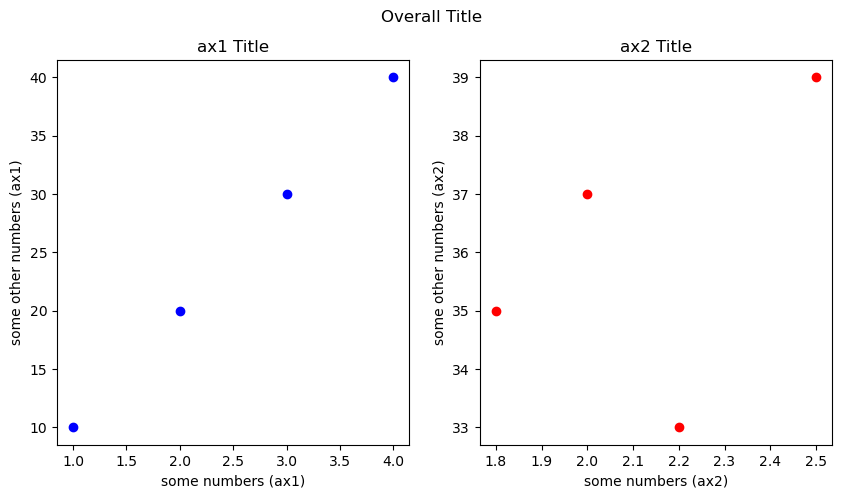

In [7]:
# Create the figure and axis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
# Add the first dataset - specify the colour as blue:
ax1.scatter(x=[1, 2, 3, 4], y=[10, 20, 30, 40], color="blue")
# Add the second dataset - specify the colour as red:
ax2.scatter(x=[1.8, 2, 2.2, 2.5], y=[35, 37, 33, 39], color="red")
# Add a x axis label to the axis.
ax1.set_xlabel("some numbers (ax1)")
# Add a y axis label to the axis.
ax1.set_ylabel("some other numbers (ax1)")
# Add title for axis ax1
ax1.set_title("ax1 Title")
# Add a x axis label to the axis.
ax2.set_xlabel("some numbers (ax2)")
# Add a y axis label to the axis.
ax2.set_ylabel("some other numbers (ax2)")
# Add title for axis ax2
ax2.set_title("ax2 Title")
# Set the overall figure title
fig.suptitle("Overall Title")

#### subplots - Three Axes (Row)

Text(0.5, 0.98, 'Overall Title')

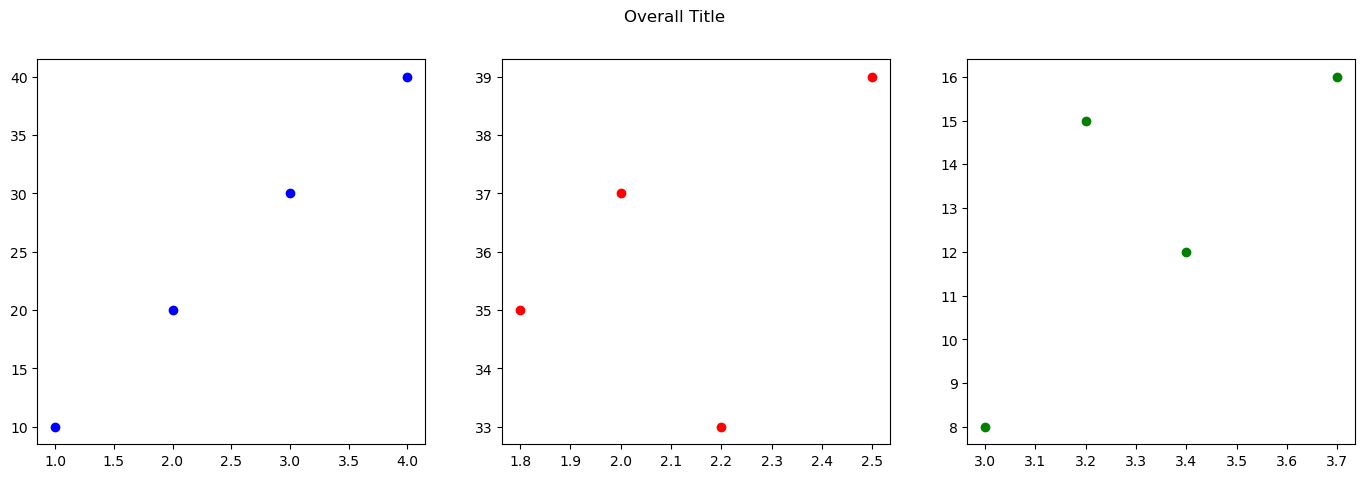

In [8]:
# Create the figure and axis
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17, 5))
# Add the first dataset - specify the colour as blue:
ax1.scatter(x=[1, 2, 3, 4], y=[10, 20, 30, 40], color="blue")
# Add the second dataset - specify the colour as red:
ax2.scatter(x=[1.8, 2, 2.2, 2.5], y=[35, 37, 33, 39], color="red")
# Add the third dataset - specify the colour as green:
ax3.scatter(x=[3.2, 3, 3.7, 3.4], y=[15, 8, 16, 12], color="green")
# Set the overall figure title
fig.suptitle("Overall Title")

#### subplots - Four Axes (Grid)

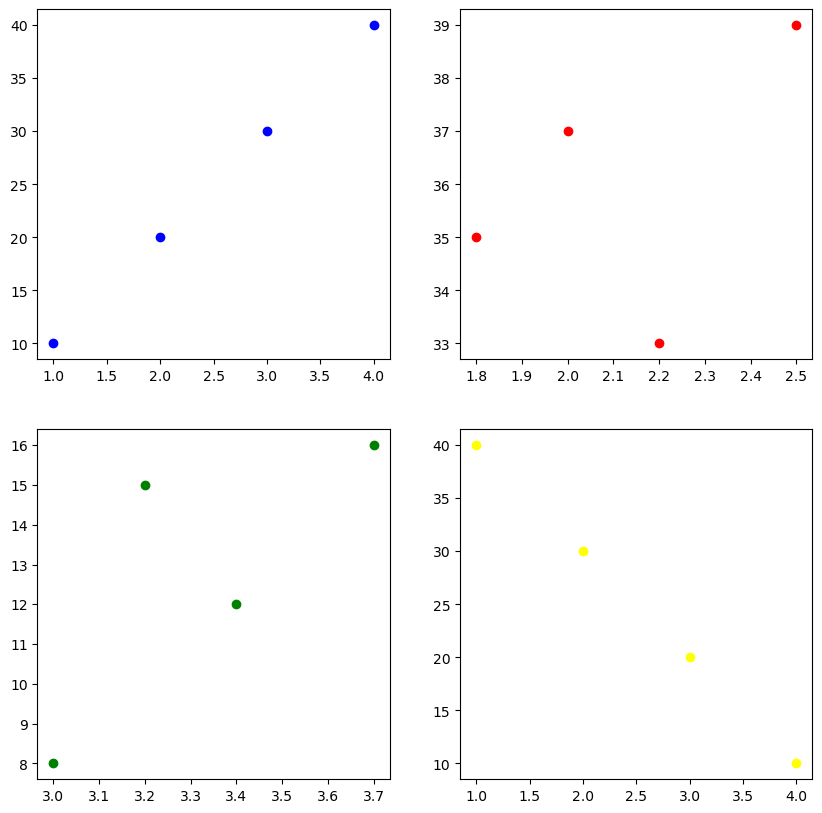

In [9]:
# Create the figure and axis
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 10))
# Add the first dataset - specify the colour as blue:
ax1.scatter(x=[1, 2, 3, 4], y=[10, 20, 30, 40], color="blue")
# Add the second dataset - specify the colour as red:
ax2.scatter(x=[1.8, 2, 2.2, 2.5], y=[35, 37, 33, 39], color="red")
# Add the third dataset - specify the colour as green:
ax3.scatter(x=[3.2, 3, 3.7, 3.4], y=[15, 8, 16, 12], color="green")
# Add the fourth dataset - specify the colour as yellow:
ax4.scatter(x=[4, 3, 2, 1], y=[10, 20, 30, 40], color="yellow")

#### gridspec - Two Axis (Row)

Text(0.5, 0.98, 'Overall Title')

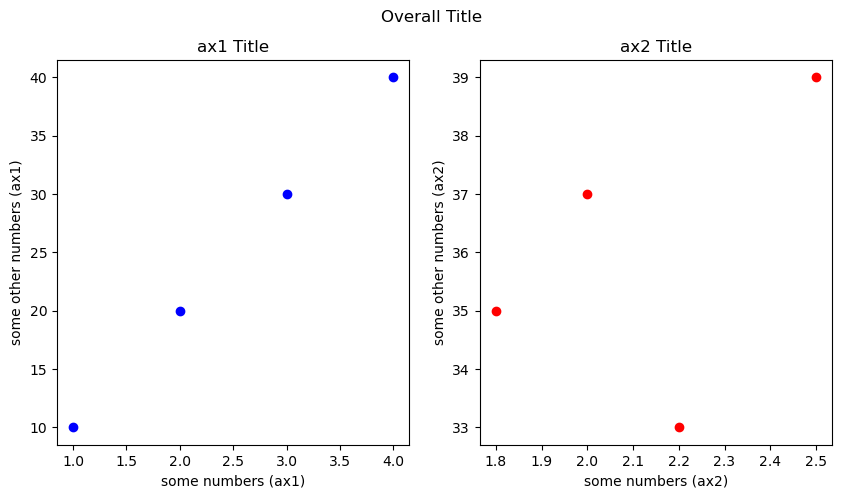

In [10]:
# Create the figure and gridspec
fig = plt.figure(figsize=(10, 5))  #
gspec = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)

# Get the first axis
ax1 = fig.add_subplot(gspec[0, 0])
# Add the first dataset - specify the colour as blue:
ax1.scatter(x=[1, 2, 3, 4], y=[10, 20, 30, 40], color="blue")
# Add a x axis label to the axis.
ax1.set_xlabel("some numbers (ax1)")
# Add a y axis label to the axis.
ax1.set_ylabel("some other numbers (ax1)")
# Add title for axis ax1
ax1.set_title("ax1 Title")

# Get the second axis
ax2 = fig.add_subplot(gspec[0, 1])
# Add the second dataset - specify the colour as red:
ax2.scatter(x=[1.8, 2, 2.2, 2.5], y=[35, 37, 33, 39], color="red")
# Add a x axis label to the axis.
ax2.set_xlabel("some numbers (ax2)")
# Add a y axis label to the axis.
ax2.set_ylabel("some other numbers (ax2)")
# Add title for axis ax2
ax2.set_title("ax2 Title")


# Set the overall figure title
fig.suptitle("Overall Title")

#### gridspec - Three Axes (Row)

Text(0.5, 0.98, 'Overall Title')

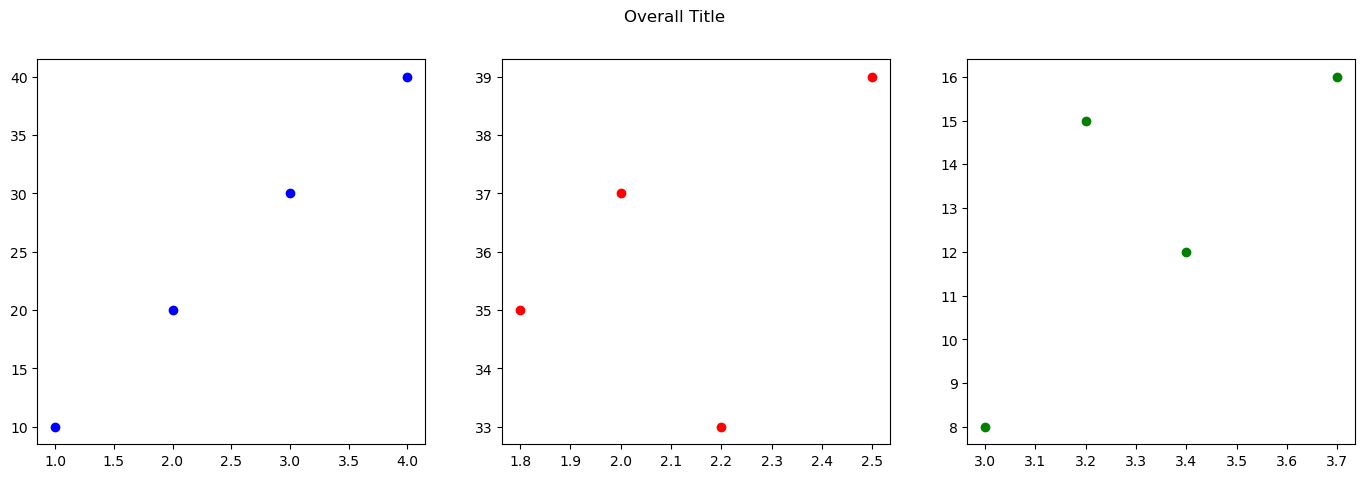

In [11]:
# Create the figure and gridspec
fig = plt.figure(figsize=(17, 5))
gspec = gridspec.GridSpec(ncols=3, nrows=1, figure=fig)

# Get the first axis
ax1 = fig.add_subplot(gspec[0, 0])
# Add the first dataset - specify the colour as blue:
ax1.scatter(x=[1, 2, 3, 4], y=[10, 20, 30, 40], color="blue")

# Get the first axis
ax2 = fig.add_subplot(gspec[0, 1])
# Add the second dataset - specify the colour as red:
ax2.scatter(x=[1.8, 2, 2.2, 2.5], y=[35, 37, 33, 39], color="red")

# Get the first axis
ax3 = fig.add_subplot(gspec[0, 2])
# Add the third dataset - specify the colour as green:
ax3.scatter(x=[3.2, 3, 3.7, 3.4], y=[15, 8, 16, 12], color="green")

# Set the overall figure title
fig.suptitle("Overall Title")

#### gridspec - Four Axes (Grid)

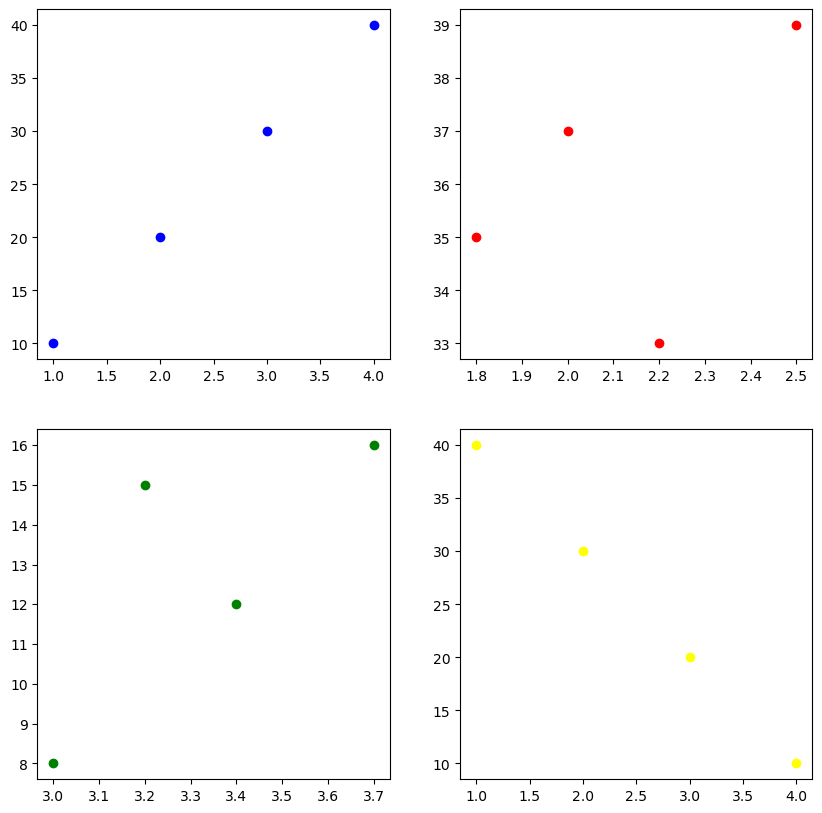

In [12]:
# Create the figure and gridspec
fig = plt.figure(figsize=(10, 10))
gspec = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)

# Get the first axis
ax1 = fig.add_subplot(gspec[0, 0])
# Add the first dataset - specify the colour as blue:
ax1.scatter(x=[1, 2, 3, 4], y=[10, 20, 30, 40], color="blue")

# Get the second axis
ax2 = fig.add_subplot(gspec[0, 1])
# Add the second dataset - specify the colour as red:
ax2.scatter(x=[1.8, 2, 2.2, 2.5], y=[35, 37, 33, 39], color="red")

# Get the third axis
ax3 = fig.add_subplot(gspec[1, 0])
# Add the third dataset - specify the colour as green:
ax3.scatter(x=[3.2, 3, 3.7, 3.4], y=[15, 8, 16, 12], color="green")

# Get the third axis
ax4 = fig.add_subplot(gspec[1, 1])
# Add the fourth dataset - specify the colour as yellow:
ax4.scatter(x=[4, 3, 2, 1], y=[10, 20, 30, 40], color="yellow")